In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import squarify
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff

In [91]:
df = pd.read_csv('sat.trn', header=None)
df_test = pd.read_csv('sat.tst', header=None)

In [92]:
data_len = df[0].count()

In [93]:
images = []
classes = []
for i in range(0,data_len):
    images.append(df.values[i][0][0:len(df.values[i][0])-1])
    classes.append(df.values[i][0][-1])

In [94]:
for i in range(0,data_len):
    images[i] = images[i].split(' ');
    images[i] = np.array(images[i])
    images[i] = images[i][0:len(images[i])-1]
    images[i] = images[i].astype(np.int64)
classes = np.array(classes)
classes.astype(np.int64)

array([3, 3, 3, ..., 4, 4, 4])

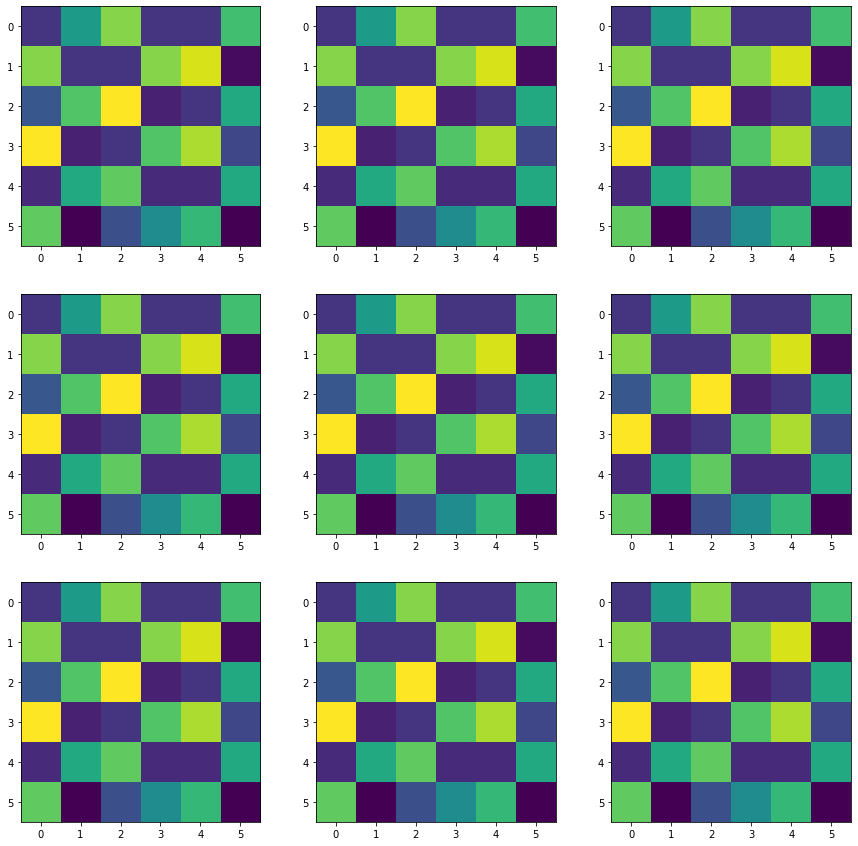

In [133]:
fig, axes = plt.subplots(3, 3,figsize=(15,15))
n_samples = 9
for i in range(n_samples):
    for x in range(3):
        for y in range(3):
            axes[x, y].imshow(images[i].reshape((6,6)))
plt.show()


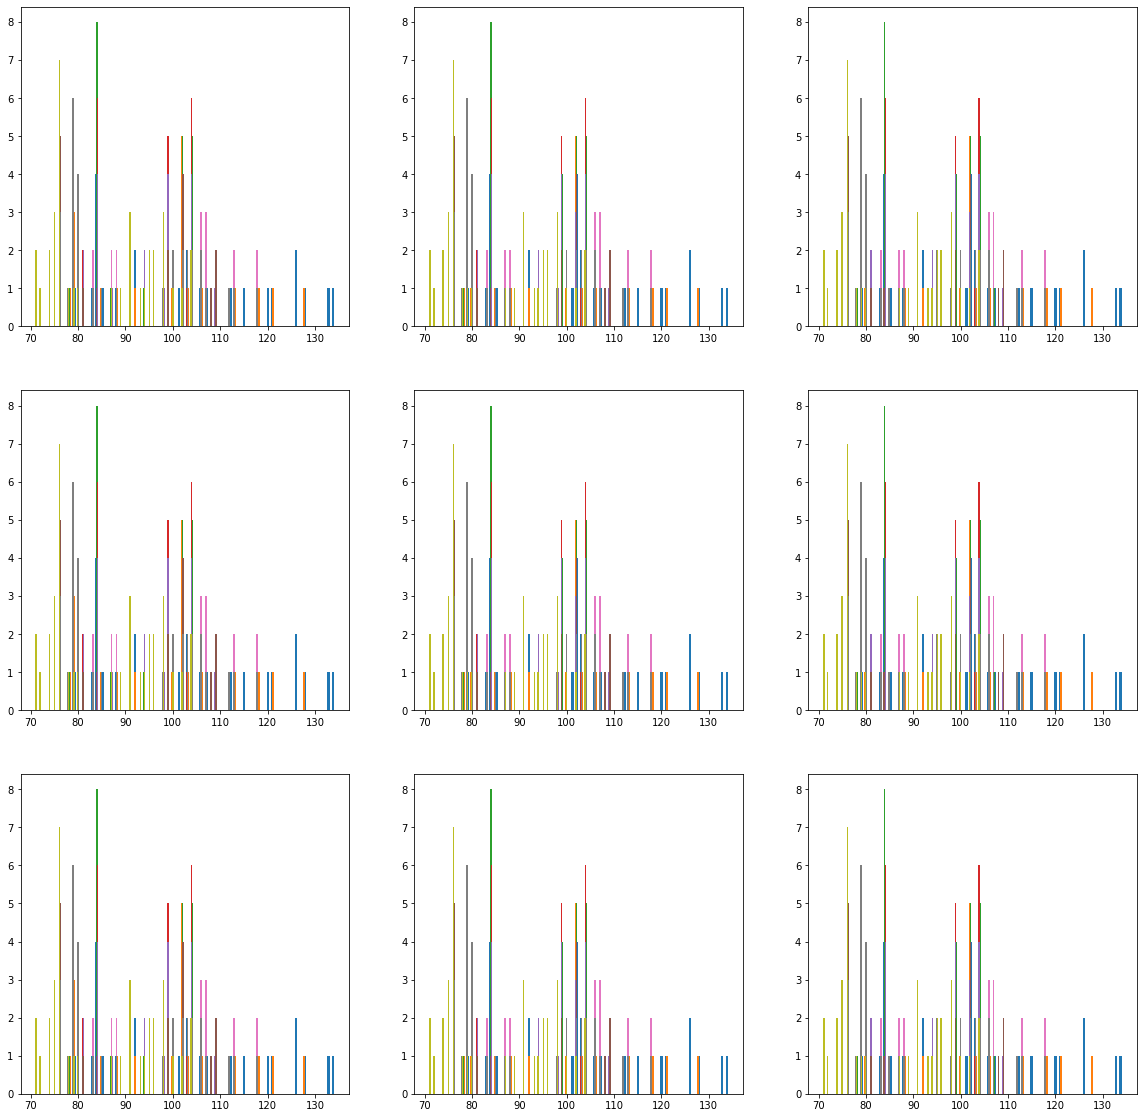

In [134]:
fig, axes = plt.subplots(3, 3,figsize=(20,20))
n_samples = 9
for i in range(n_samples):
    for x in range(3):
        for y in range(3):
            axes[x, y].hist(images[i], bins=120)
plt.show()